In [515]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import holidays

In [516]:
# Load your time series data
df = pd.read_csv('00_MRT_2023_LSTM1.csv')
df.head(31)

,Day,Date,Time,DateAndTime,Entry,is_weekend,rain_class,rain_amount,rain_desc
0,Sunday,1/1/2023,4:00,01.01.2023 04.00.00,0,1,2,1.5,Light Rain
1,Sunday,1/1/2023,5:00,01.01.2023 05.00.00,0,1,2,1.5,Light Rain
2,Sunday,1/1/2023,6:00,01.01.2023 06.00.00,956,1,2,1.5,Light Rain
3,Sunday,1/1/2023,7:00,01.01.2023 07.00.00,1076,1,2,1.5,Light Rain
4,Sunday,1/1/2023,8:00,01.01.2023 08.00.00,1081,1,2,1.5,Light Rain
5,Sunday,1/1/2023,9:00,01.01.2023 09.00.00,1276,1,2,1.5,Light Rain
6,Sunday,1/1/2023,10:00,01.01.2023 10.00.00,1709,1,2,1.5,Light Rain
7,Sunday,1/1/2023,11:00,01.01.2023 11.00.00,1998,1,2,1.5,Light Rain
8,Sunday,1/1/2023,12:00,01.01.2023 12.00.00,1917,1,2,1.5,Light Rain
9,Sunday,1/1/2023,13:00,01.01.2023 13.00.00,1980,1,2,1.5,Light Rain


In [517]:
ph_holidays = holidays.PH()
df['is_holiday'] = df['Date'].apply(lambda x: 1 if x in ph_holidays else 0)
df.head(5)

,Day,Date,Time,DateAndTime,Entry,is_weekend,rain_class,rain_amount,rain_desc,is_holiday
0,Sunday,1/1/2023,4:00,01.01.2023 04.00.00,0,1,2,1.5,Light Rain,1
1,Sunday,1/1/2023,5:00,01.01.2023 05.00.00,0,1,2,1.5,Light Rain,1
2,Sunday,1/1/2023,6:00,01.01.2023 06.00.00,956,1,2,1.5,Light Rain,1
3,Sunday,1/1/2023,7:00,01.01.2023 07.00.00,1076,1,2,1.5,Light Rain,1
4,Sunday,1/1/2023,8:00,01.01.2023 08.00.00,1081,1,2,1.5,Light Rain,1


In [518]:
df.drop(['Date', 'Time', 'rain_amount', 'rain_desc'], axis=1, inplace=True)
df.head(31)

,Day,DateAndTime,Entry,is_weekend,rain_class,is_holiday
0,Sunday,01.01.2023 04.00.00,0,1,2,1
1,Sunday,01.01.2023 05.00.00,0,1,2,1
2,Sunday,01.01.2023 06.00.00,956,1,2,1
3,Sunday,01.01.2023 07.00.00,1076,1,2,1
4,Sunday,01.01.2023 08.00.00,1081,1,2,1
5,Sunday,01.01.2023 09.00.00,1276,1,2,1
6,Sunday,01.01.2023 10.00.00,1709,1,2,1
7,Sunday,01.01.2023 11.00.00,1998,1,2,1
8,Sunday,01.01.2023 12.00.00,1917,1,2,1
9,Sunday,01.01.2023 13.00.00,1980,1,2,1


In [519]:
df['Date Time'] = pd.to_datetime(df['DateAndTime'], format='%d.%m.%Y %H.%M.%S')
df['hour'] = df['Date Time'].dt.hour
df['day_of_week'] = df['Date Time'].dt.dayofweek
df['month'] = df['Date Time'].dt.month
df['year'] = df['Date Time'].dt.year
df.drop(['DateAndTime', 'Day', 'is_weekend'], axis=1, inplace=True)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

model_features = ['hour', 'day_of_week', 'is_weekend', 'month', 'year', 'rain_class', 'Entry']
df_model = df[model_features]

df.head(50)

,Entry,rain_class,is_holiday,Date Time,hour,day_of_week,month,year,is_weekend
0,0,2,1,2023-01-01 04:00:00,4,6,1,2023,1
1,0,2,1,2023-01-01 05:00:00,5,6,1,2023,1
2,956,2,1,2023-01-01 06:00:00,6,6,1,2023,1
3,1076,2,1,2023-01-01 07:00:00,7,6,1,2023,1
4,1081,2,1,2023-01-01 08:00:00,8,6,1,2023,1
5,1276,2,1,2023-01-01 09:00:00,9,6,1,2023,1
6,1709,2,1,2023-01-01 10:00:00,10,6,1,2023,1
7,1998,2,1,2023-01-01 11:00:00,11,6,1,2023,1
8,1917,2,1,2023-01-01 12:00:00,12,6,1,2023,1
9,1980,2,1,2023-01-01 13:00:00,13,6,1,2023,1


In [520]:
# Display the DataFrame before normalization
print(df_model.head())
print(df_model.dtypes)

   hour  day_of_week  is_weekend  month  year  rain_class  Entry
0     4            6           1      1  2023           2      0
1     5            6           1      1  2023           2      0
2     6            6           1      1  2023           2    956
3     7            6           1      1  2023           2   1076
4     8            6           1      1  2023           2   1081
hour           int32
day_of_week    int32
is_weekend     int64
month          int32
year           int32
rain_class     int64
Entry          int64
dtype: object


In [521]:
from sklearn.preprocessing import MinMaxScaler
import joblib
# Normalize all features except 'Entry'
scaler = MinMaxScaler(feature_range=(0, 1))
df_model[df_model.columns[:-1]] = scaler.fit_transform(df_model[df_model.columns[:-1]])

# Save the scaler for the features
joblib.dump(scaler, 'model/scaler_features.pkl')

# Normalize the 'Entry' column separately
scaler_entry = MinMaxScaler(feature_range=(0, 1))
df_model['Entry'] = scaler_entry.fit_transform(df_model[['Entry']])

# Save the scaler for the 'Entry' column
joblib.dump(scaler_entry, 'model/scaler_entry.pkl')

# Display the DataFrame after normalization
print("After normalization:")
print(df_model.head())
print(df_model.dtypes)

After normalization:
       hour  day_of_week  is_weekend  month  year  rain_class     Entry
0  0.000000          1.0         1.0    0.0   0.0         0.5  0.000000
1  0.052632          1.0         1.0    0.0   0.0         0.5  0.000000
2  0.105263          1.0         1.0    0.0   0.0         0.5  0.149539
3  0.157895          1.0         1.0    0.0   0.0         0.5  0.168309
4  0.210526          1.0         1.0    0.0   0.0         0.5  0.169091
hour           float64
day_of_week    float64
is_weekend     float64
month          float64
year           float64
rain_class     float64
Entry          float64
dtype: object


C:\Users\inspiron-7460\AppData\Local\Temp\ipykernel_2964\2928577659.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\inspiron-7460\AppData\Local\Temp\ipykernel_2964\2928577659.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

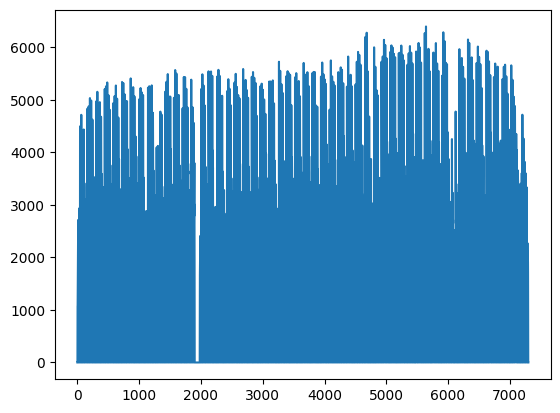

In [522]:
entry = df['Entry']
entry.plot()

In [523]:
def df_to_X_y(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][6]  # 'Entry' is the 7th column (index 6)
        y.append(label)
    return np.array(X), np.array(y)

In [524]:
X, y = df_to_X_y(df_model)
X.shape, y.shape

((7294, 6, 7), (7294,))

In [525]:
X_train, y_train = X[:5000], y[:5000]
X_val, y_val = X[5000:6000], y[5000:6000]
X_test, y_test = X, y
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5000, 6, 7), (5000,), (1000, 6, 7), (1000,), (7294, 6, 7), (7294,))

In [526]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [527]:
"""model = Sequential()
model.add(InputLayer((6, 5)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))"""
model = Sequential()
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 6, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,569 (209.25 KB)

 Trainable params: 53,569 (209.25 KB)

 Non-trainable params: 0 (0.00 B)

In [528]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the ModelCheckpoint callback with the correct file path
os.makedirs('model', exist_ok=True)
cp1 = ModelCheckpoint(filepath='model/best_lstm.keras', save_best_only=True, monitor='val_loss', mode='min')

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp1, early_stopping])


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0480 - val_loss: 0.0126
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0120 - val_loss: 0.0046
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

In [529]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

# Assuming df is the original DataFrame with the 'Date Time' column
# Extract the 'Date Time' column for the entire dataset
date_time_test = df['Date Time']

# Load the scaler for inverse transformation
scaler_entry = joblib.load('model/scaler_entry.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
# Create a DataFrame to hold the predictions and actual values
df_pred = pd.DataFrame(y_pred, columns=['Entry'])
df_actual = pd.DataFrame(y_test, columns=['Entry'])

# Inverse transform the 'Entry' column
y_pred_inv = scaler_entry.inverse_transform(df_pred)
y_test_inv = scaler_entry.inverse_transform(df_actual)

# Ensure date_time_test matches the length of y_test_inv and y_pred_inv
date_time_test = date_time_test[-len(y_test_inv):]

# Round the predictions to the nearest whole number and ensure non-negative values
y_pred_inv = np.round(np.maximum(y_pred_inv, 0))
y_test_inv = np.round(np.maximum(y_test_inv, 0))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plot the results with 'Date Time' as the x-axis using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=date_time_test, y=y_test_inv.flatten(), mode='lines', name='Actual Values'))
fig.add_trace(go.Scatter(x=date_time_test, y=y_pred_inv.flatten(), mode='lines', name='Predicted Values'))

fig.update_layout(
    title='LSTM Model Predictions vs Actual Values',
    xaxis_title='Date Time',
    yaxis_title='Entry',
    legend_title='Legend'
)

fig.show()

228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Mean Squared Error (MSE): 59568.919385796544
Mean Absolute Error (MAE): 151.41623251987934
R-squared (R²): 0.9675578644347906


In [530]:
# Inverse transform the actual values
df_actual = pd.DataFrame(y_test, columns=['Entry'])
y_test_inv = scaler_entry.inverse_transform(df_actual)

# Ensure date_time_test matches the length of y_test_inv and y_pred_inv
date_time_test = df['Date Time'][-len(y_test_inv):]

# Create a DataFrame with the predictions, actual values, and corresponding is_holiday and rain_class
df_pred_with_time = pd.DataFrame({
    'Date Time': date_time_test,
    'Actual Entry': y_test_inv.flatten(),
    'Predicted Entry': y_pred_inv.flatten(),
    'is_holiday': df['is_holiday'][-len(y_test_inv):].values,  # Add is_holiday to the DataFrame
    'rain_class': df['rain_class'][-len(y_test_inv):].values   # Add rain_class to the DataFrame
})

# Extract the hour from the 'Date Time' column
df_pred_with_time['hour'] = df_pred_with_time['Date Time'].dt.hour

# Aggregate the actual and predicted values by hour
hourly_trend = df_pred_with_time.groupby('hour').agg({
    'Actual Entry': 'mean',
    'Predicted Entry': 'mean'
}).reset_index()

# Display the aggregated data
print(hourly_trend)

import plotly.express as px

# Create a Plotly figure for the hourly trend based on actual and predicted values
fig = px.line(hourly_trend, x='hour', y=['Actual Entry', 'Predicted Entry'], title='Hourly Trend of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Average Entry',
    legend_title='Legend'
)


# Show the plot
fig.show()

    hour  Actual Entry  Predicted Entry
0      4      4.703297         0.000000
1      5   2364.491758      2402.774658
2      6   3547.035714      3515.607178
3      7   4268.269231      4333.631836
4      8   3714.502747      3790.225342
5      9   3168.857143      3183.162109
6     10   2702.572603      2725.438477
7     11   2679.821918      2684.534180
8     12   2657.849315      2624.093262
9     13   2572.580822      2585.819092
10    14   2534.238356      2605.550781
11    15   2687.106849      2761.591797
12    16   3104.060274      3106.616455
13    17   3484.934247      3426.358887
14    18   3368.079452      3415.443848
15    19   3078.235616      3076.536865
16    20   2516.219178      2520.950684
17    21   1801.383562      1587.586304
18    22     73.232877        44.024658
19    23      0.265753         0.000000


In [531]:
# Extract the day of the week from the 'Date Time' column
df_pred_with_time['day_of_week'] = df_pred_with_time['Date Time'].dt.dayofweek

# Aggregate the actual and predicted values by day of the week
daily_trend = df_pred_with_time.groupby('day_of_week').agg({
    'Actual Entry': 'mean',
    'Predicted Entry': 'mean'
}).reset_index()

# Map day_of_week numbers to day names, starting with Sunday
day_names = {6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}
daily_trend['day_name'] = daily_trend['day_of_week'].map(day_names)

# Reorder the DataFrame to start with Sunday
daily_trend = daily_trend.set_index('day_of_week').loc[[6, 0, 1, 2, 3, 4, 5]].reset_index()

# Display the aggregated data
print(daily_trend)

# Create a Plotly figure for the daily trend based on actual and predicted values
fig = px.line(daily_trend, x='day_name', y=['Actual Entry', 'Predicted Entry'], title='Daily Trend of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Average Entry',
    legend_title='Legend'
)

# Show the plot
fig.show()

   day_of_week  Actual Entry  Predicted Entry   day_name
0            6   1884.913662      1899.742920     Sunday
1            0   2651.309615      2670.750977     Monday
2            1   2744.129808      2769.483643    Tuesday
3            2   2764.172115      2748.716309  Wednesday
4            3   2614.897115      2642.494141   Thursday
5            4   2692.854808      2658.048096     Friday
6            5   2269.284615      2253.560547   Saturday


In [532]:
# Extract the month from the 'Date Time' column
df_pred_with_time['month'] = df_pred_with_time['Date Time'].dt.month

# Aggregate the actual and predicted values by month
monthly_trend = df_pred_with_time.groupby('month').agg({
    'Actual Entry': 'sum',
    'Predicted Entry': 'sum'
}).reset_index()

# Map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_trend['month_name'] = monthly_trend['month'].map(month_names)

# Display the aggregated data
print(monthly_trend)

# Create a Plotly figure for the monthly trend based on actual and predicted values
fig = px.line(monthly_trend, x='month_name', y=['Actual Entry', 'Predicted Entry'], title='Monthly Trend of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Entry',
    legend_title='Legend'
)

# Show the plot
fig.show()

    month  Actual Entry  Predicted Entry month_name
0       1     1462530.0        1451075.0    January
1       2     1406923.0        1378219.0   February
2       3     1525850.0        1533314.0      March
3       4     1241611.0        1265564.0      April
4       5     1520365.0        1537949.0        May
5       6     1494518.0        1499689.0       June
6       7     1561701.0        1562388.0       July
7       8     1659979.0        1635276.0     August
8       9     1630212.0        1611292.0  September
9      10     1618931.0        1627973.0    October
10     11     1571549.0        1604418.0   November
11     12     1658644.0        1667948.0   December


In [533]:
# Calculate mean and standard deviation for holidays and non-holidays
mean_holiday = df[df['is_holiday'] == 1]['Entry'].mean()
std_holiday = df[df['is_holiday'] == 1]['Entry'].std()
mean_non_holiday = df[df['is_holiday'] == 0]['Entry'].mean()
std_non_holiday = df[df['is_holiday'] == 0]['Entry'].std()

print(f"Holiday - Mean: {mean_holiday}, Std Dev: {std_holiday}")
print(f"Non-Holiday - Mean: {mean_non_holiday}, Std Dev: {std_non_holiday}")

Holiday - Mean: 1617.7886363636364, Std Dev: 1194.5135525415462
Non-Holiday - Mean: 2572.2120991253646, Std Dev: 1345.138323032595


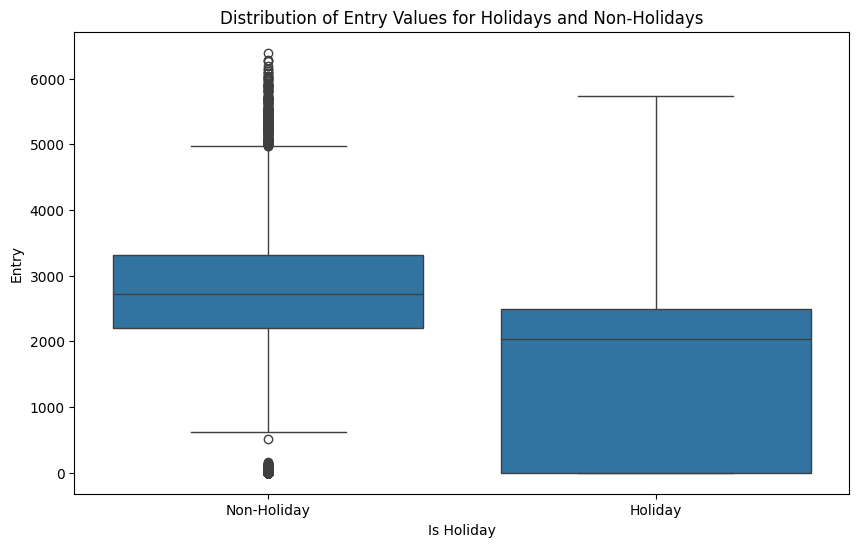

In [534]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the distribution of Entry values for holidays and non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='Entry', data=df)
plt.title('Distribution of Entry Values for Holidays and Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Entry')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [535]:
from scipy.stats import ttest_ind

# Perform t-test
holiday_entries = df[df['is_holiday'] == 1]['Entry']
non_holiday_entries = df[df['is_holiday'] == 0]['Entry']

t_stat, p_value = ttest_ind(holiday_entries, non_holiday_entries, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Entry values between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Entry values between holidays and non-holidays.")

T-statistic: -16.117442436337228, P-value: 1.380634875723875e-47
Reject the null hypothesis: There is a significant difference in Entry values between holidays and non-holidays.


In [536]:
# Calculate mean and standard deviation for each rain_class
rain_class_stats = df.groupby('rain_class')['Entry'].agg(['mean', 'std']).reset_index()
print(rain_class_stats)

   rain_class         mean          std
0           0  2467.761607  1352.085622
1           1  2522.908537  1297.676409
2           2  2596.567347  1364.042257
3           3  2482.929348  1396.103483
4           4  2596.545833  1348.370055


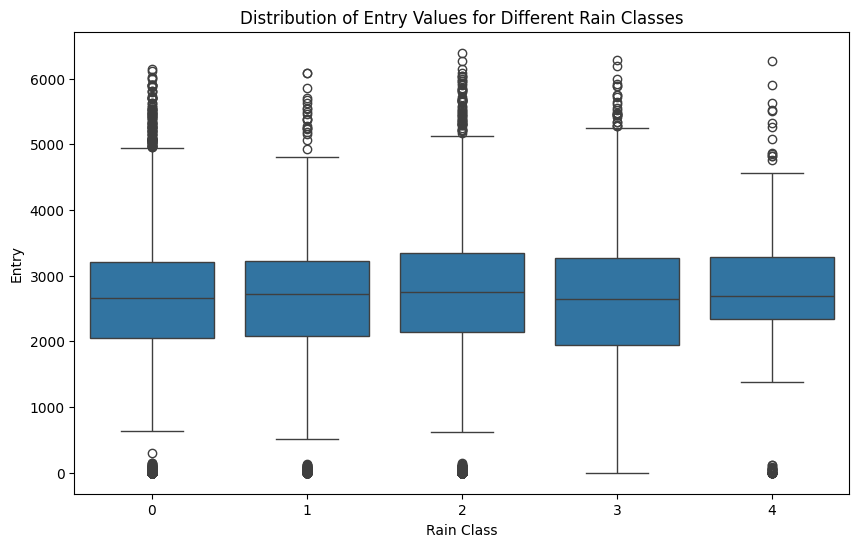

F-statistic: 3.1503374819829766, P-value: 0.013450192444349805
Reject the null hypothesis: There is a significant difference in Entry values between different rain classes.


In [537]:
# Box plot to visualize the distribution of Entry values for different rain classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='rain_class', y='Entry', data=df)
plt.title('Distribution of Entry Values for Different Rain Classes')
plt.xlabel('Rain Class')
plt.ylabel('Entry')
plt.show()

from scipy.stats import f_oneway

# Perform ANOVA
rain_class_groups = [df[df['rain_class'] == rc]['Entry'] for rc in df['rain_class'].unique()]
f_stat, p_value = f_oneway(*rain_class_groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Entry values between different rain classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Entry values between different rain classes.")

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  55.1469 0.8343  -88.8375 199.1314  False
     0      2 128.8057 0.0074   23.7398 233.8717   True
     0      3  15.1677 0.9982 -122.3828 152.7183  False
     0      4 128.7842  0.613 -118.2061 375.7745  False
     1      2  73.6588 0.6867  -80.0828 227.4004  False
     1      3 -39.9792 0.9729 -217.5116 137.5533  False
     1      4  73.6373  0.947 -197.6593 344.9339  False
     2      3 -113.638 0.2206 -261.3712  34.0952  False
     2      4  -0.0215    1.0 -252.8242 252.7811  False
     3      4 113.6165 0.7759  -154.321 381.5539  False
-------------------------------------------------------


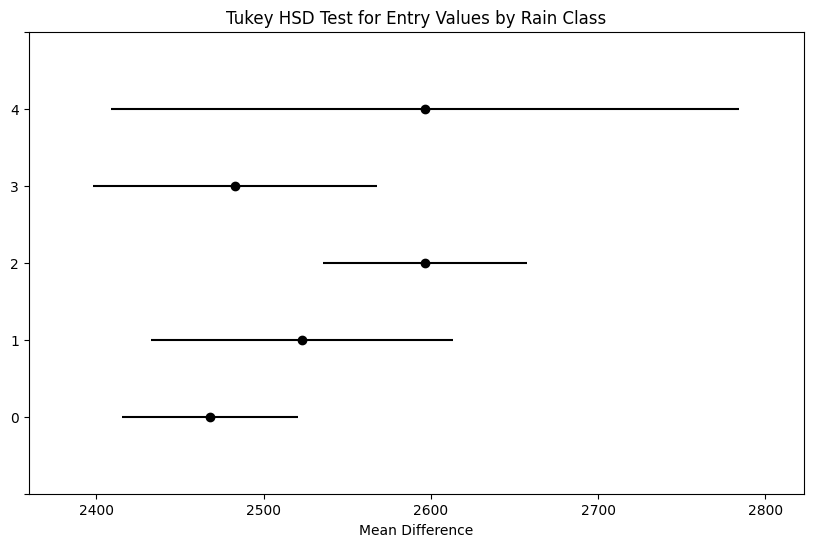

In [538]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Entry'], groups=df['rain_class'], alpha=0.05)
print(tukey)

# Plot the results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Entry Values by Rain Class')
plt.xlabel('Mean Difference')
plt.show()